# line plot with multifacets


In [1]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot
import pandas as pd

nuqta = sns.load_dataset("dots")
nuqta.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


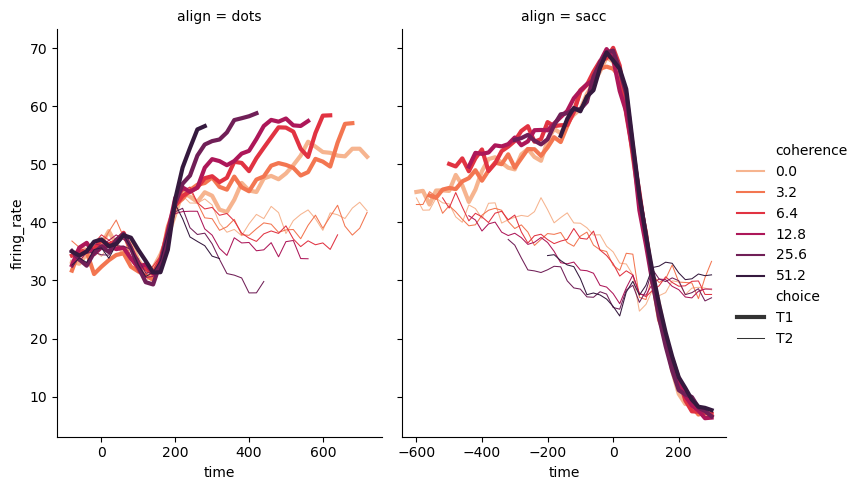

In [2]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot

nuqta = sns.load_dataset("dots")

#defining a color palette
p = sns.color_palette('rocket_r')

#plot lineplot

sns.relplot(
      data=nuqta,
      x="time", y="firing_rate",
      hue="coherence", size="choice", col="align",
      kind="line", size_order=["T1" , "T2"], palette=p,
      height=5, aspect=0.75, facet_kws=dict(sharex=False),
)


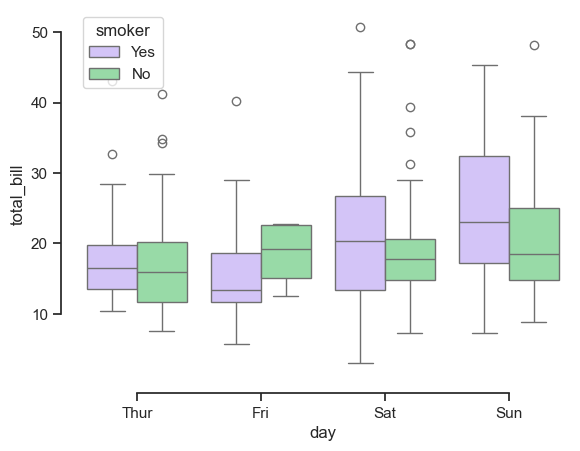

In [3]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# load the example tips dataset
tips = sns.load_dataset("tips")

#draw a nested boxplotto show to show billday and time
sns.boxplot(x="day", y="total_bill",
           hue="smoker", palette=["m" , "g"],
           data=tips)
sns.despine(offset=10 , trim=True)

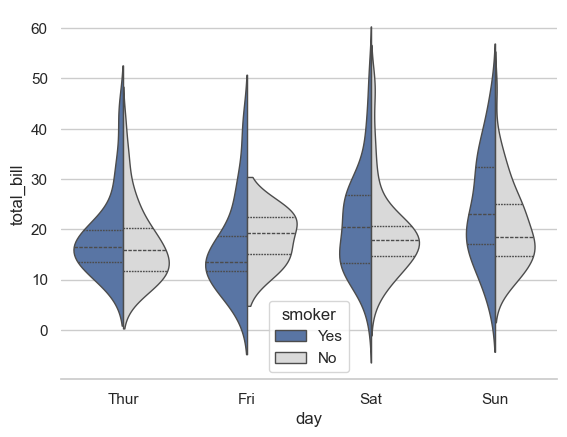

In [4]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# load the example tips dataset
tips = sns.load_dataset("tips")

#draw a nested violinplot and split the violins for easier comparsion
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
            split=True, inner="quart",linewidth=1,
            palette={"Yes": "b", "No": "0.85"})
sns.despine(left=True)

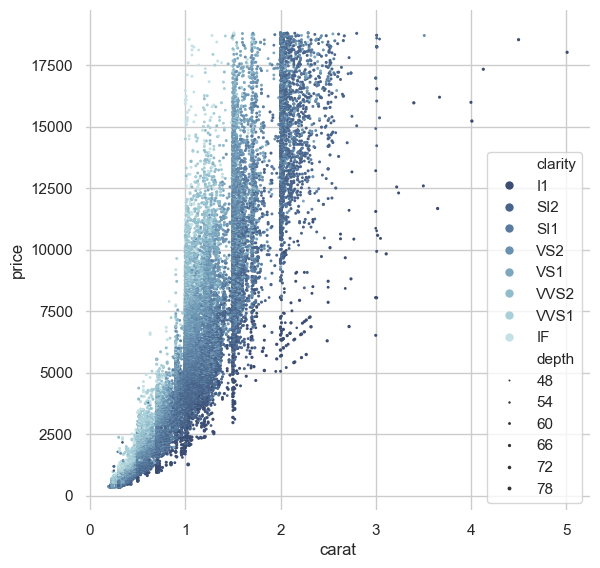

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamond = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point color and sizes to different variables
f, ax = plt.subplots(figsize=(6.5, 6.5))  

sns.despine(f, left=True, bottom=True)

clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.scatterplot(
    x="carat", y="price", 
    hue="clarity", size="depth",
    palette="ch:r=-0.2,d=0.3_r", 
    hue_order=clarity_ranking, 
    sizes=(1, 8), linewidth=0,
    data=diamond, ax=ax  
)

plt.show()


C:\Users\HASEEB\AppData\Local\Temp\ipykernel_12316\2809074804.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="distance", y="method", data=planets,


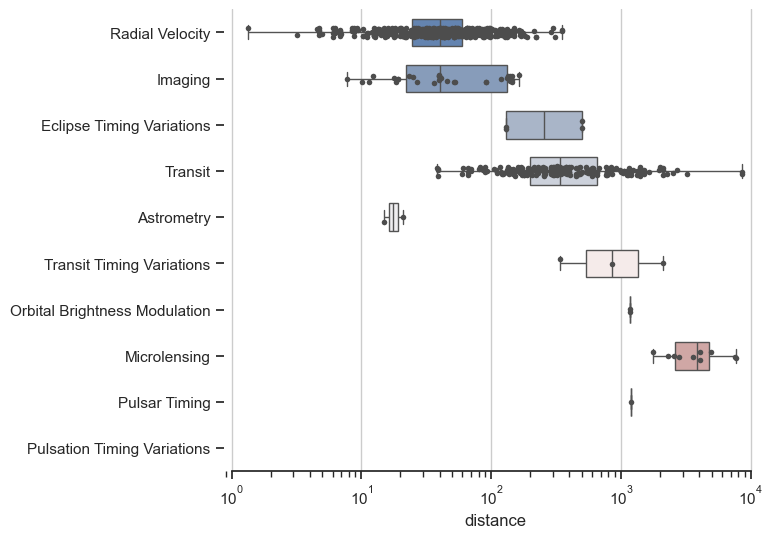

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x-axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=0.6, palette="vlag")

# Add points to show each observation
sns.stripplot(
    x="distance", y="method", data=planets,
    size=4, color="0.3", linewidth=0
)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


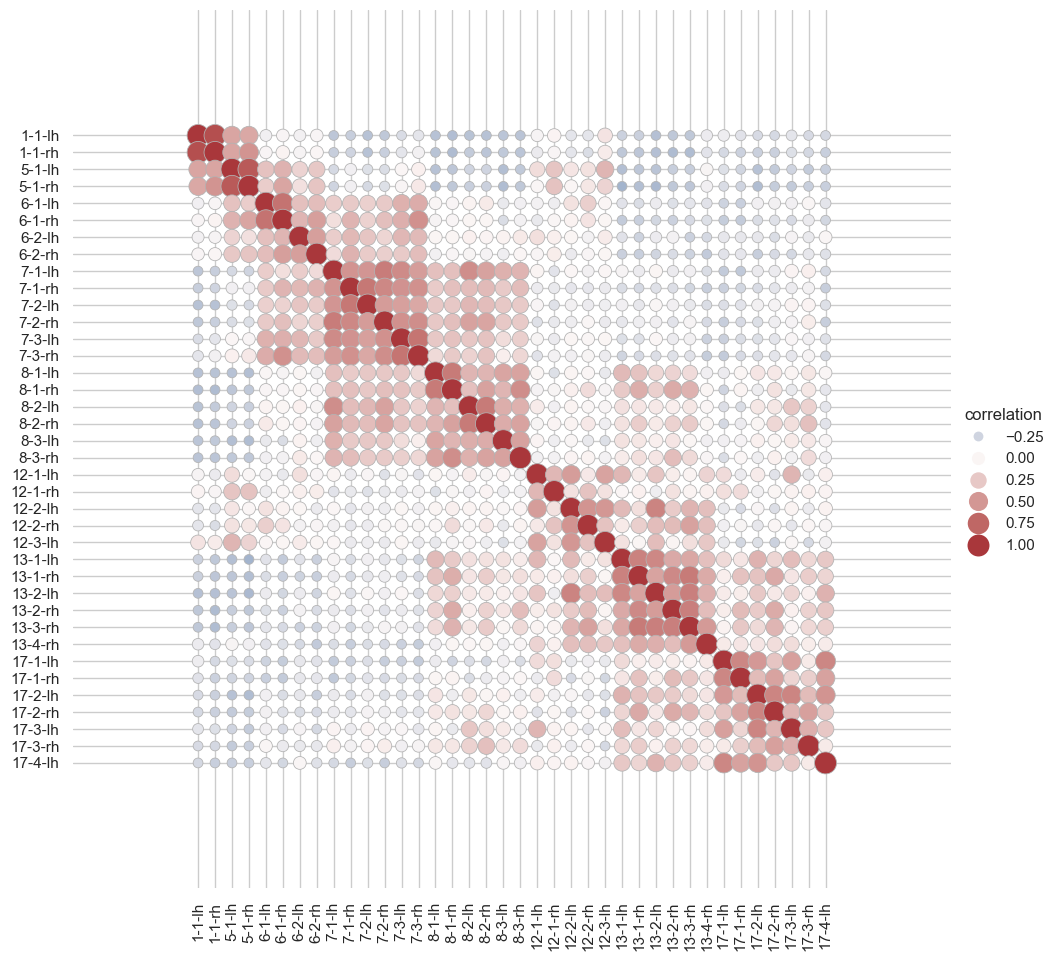

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

sns.set_theme(style="whitegrid")

# Load the brain network dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_network = [1, 5, 6, 7, 8, 12, 13, 17]
used_column = (df.columns
               .get_level_values("network")
               .astype(int)
               .isin(used_network))

df = df.loc[:, used_column]
df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1",
    hue="correlation", size="correlation",
    palette="vlag",
    hue_norm=Normalize(-1, 1),
    edgecolor="0.7",
    height=10, sizes=(50, 250), size_norm=(-0.2, 0.8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(0.2)

# Rotate x-axis tick labels
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

# Fix legend handle edge colors


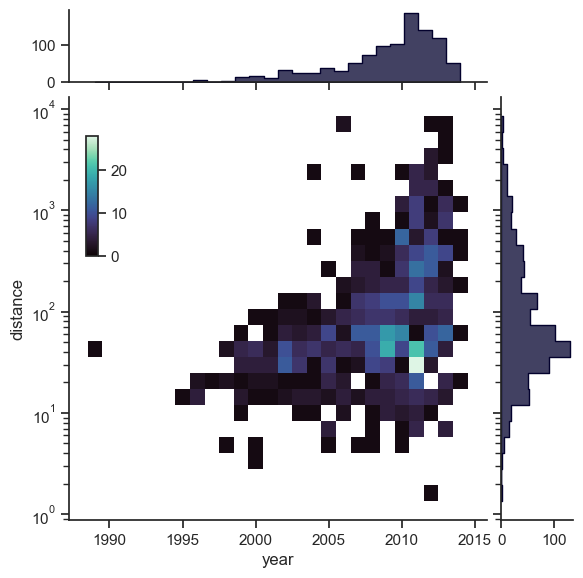

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

# Set a log scaling on the y-axis
g.ax_joint.set(yscale="log")

# Create an inset axis for the histogram colorbar
cax = g.figure.add_axes([0.15, 0.55, 0.02, 0.2])  # [left, bottom, width, height]

# Add the joint histogram with color mapping
g.plot_joint(
    sns.histplot,
    discrete=(True, False),
    cmap="mako", 
    cbar=True,
    cbar_ax=cax 
)

# Add marginal histograms
g.plot_marginals(
    sns.histplot,
    element="step",
    color="#03012d"
)

plt.show()


C:\Users\HASEEB\AppData\Local\Temp\ipykernel_12316\2039300008.py:7: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='linear' for the same effect.
  sns.boxenplot(x="clarity", y="carat",


<Axes: xlabel='clarity', ylabel='carat'>

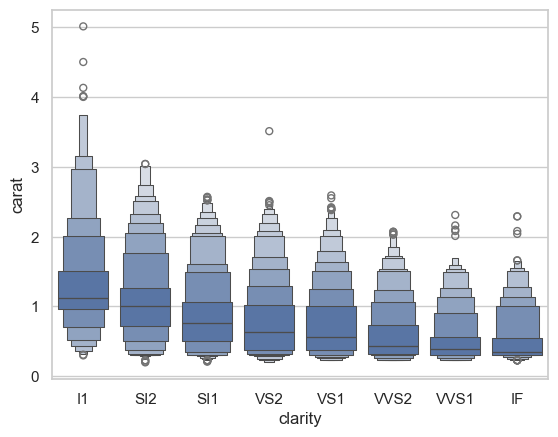

In [9]:
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(x="clarity", y="carat",
             color="b", order=clarity_ranking,
             scale="linear", data=diamonds)

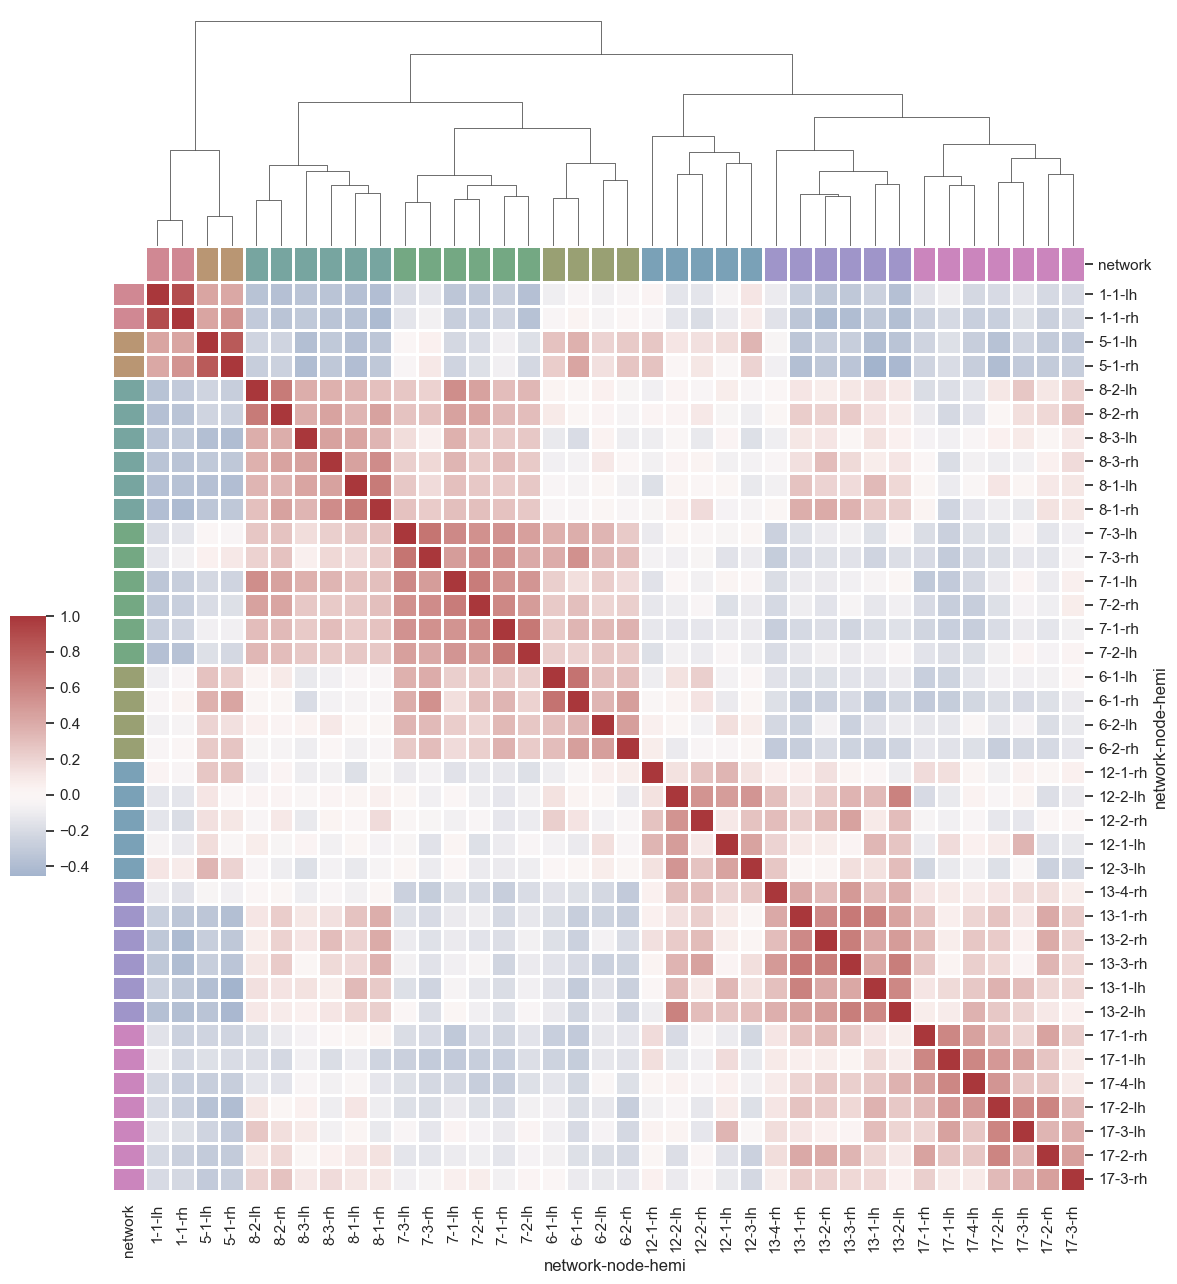

In [10]:
import seaborn as sns
import pandas as pd
sns.set_theme()

# Load the brain network dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the network
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_column = (df.columns
               .get_level_values("network")
               .astype(int)
               .isin(used_networks))

df = df.loc[:, used_column]

# Create the categorical palette to identify the network
network_pal = sns.husl_palette(8, s=0.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of matrix
networks = df.columns.get_level_values("network").astype(str)
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw a full plot
g = sns.clustermap(
    df.corr(), center=0, cmap="vlag",
    row_colors=network_colors, col_colors=network_colors,
    dendrogram_ratio=(0.1, 0.2),
    cbar_pos=(0.02, 0.32, 0.03, 0.2),
    linewidths=0.75, figsize=(12, 13)
)

# Optionally remove row dendrogram
g.ax_row_dendrogram.remove()



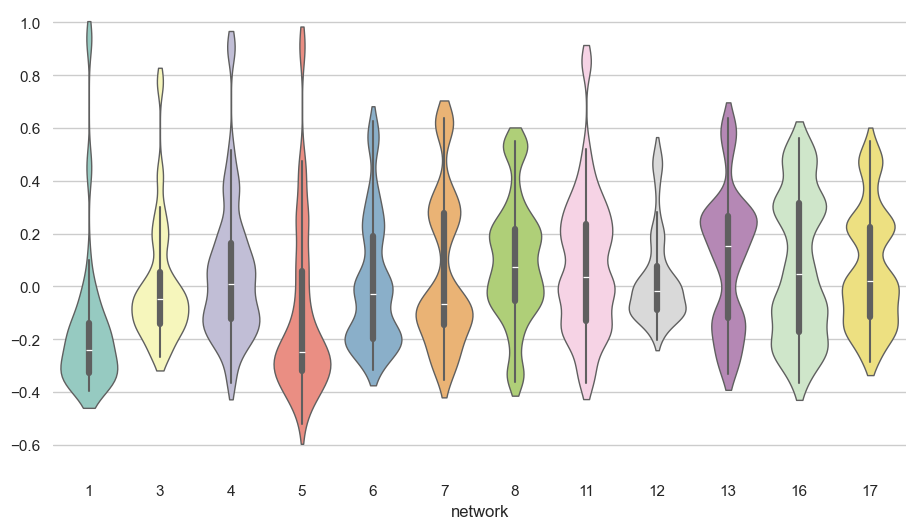

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

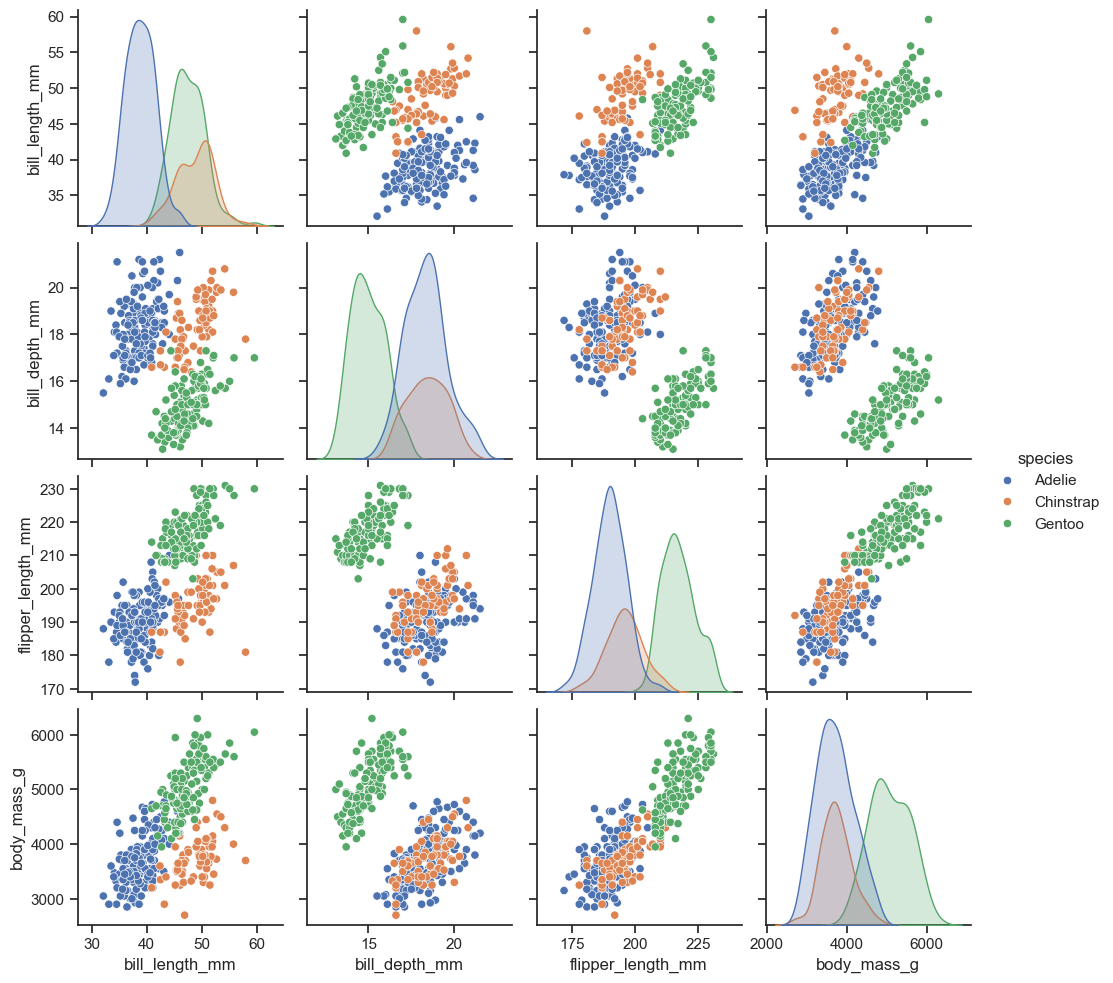

In [12]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

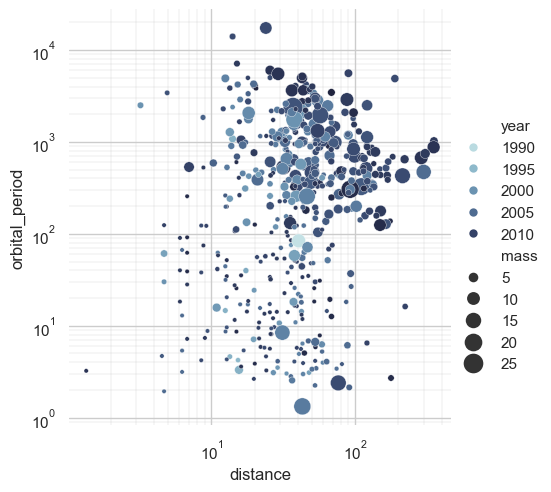

In [13]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

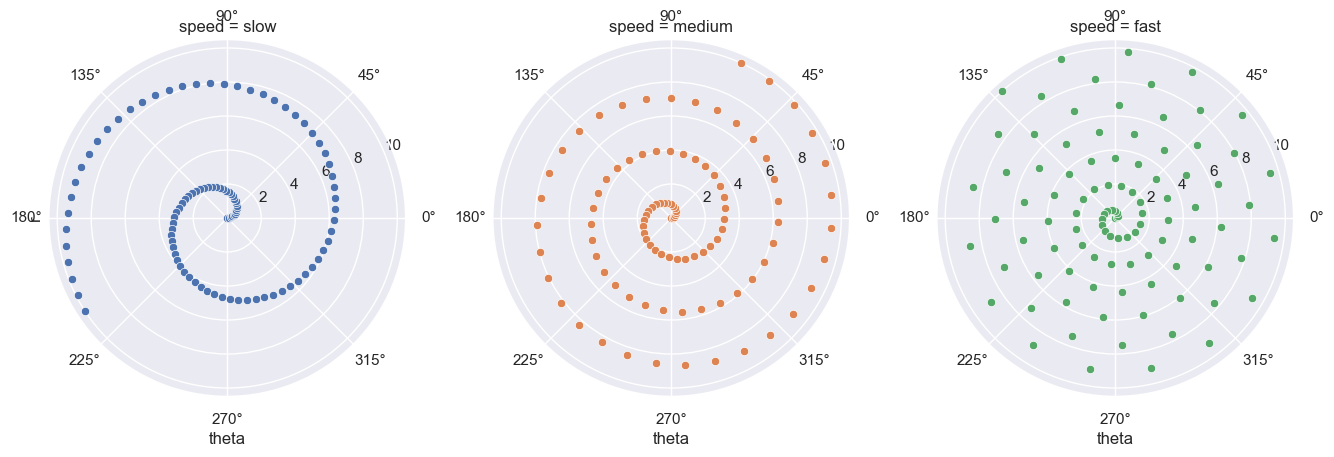

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")

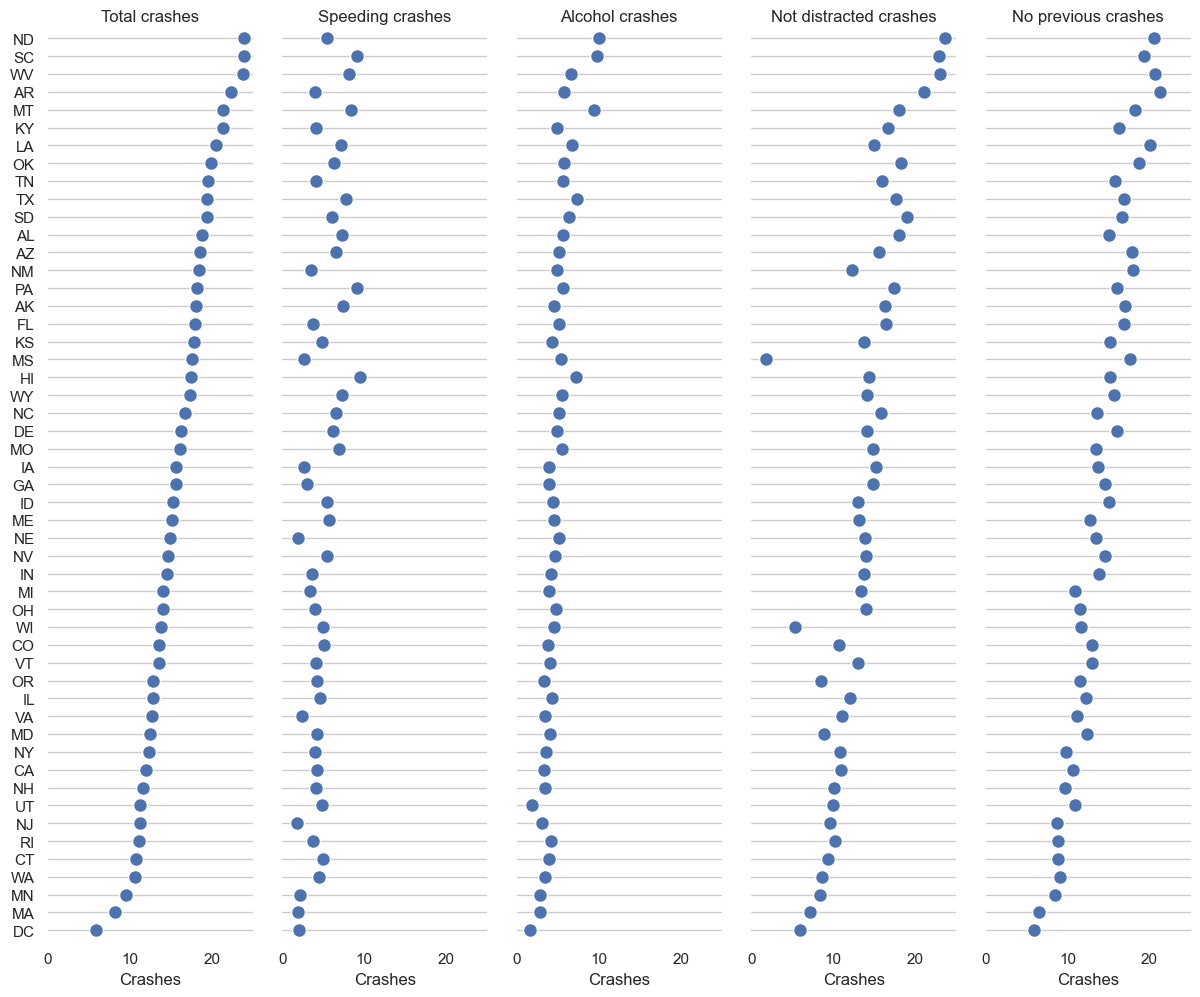

In [15]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                 x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [16]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot
import pandas as pd

nuqta = sns.load_dataset("dots")
nuqta.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


<Axes: xlabel='choice', ylabel='coherence'>

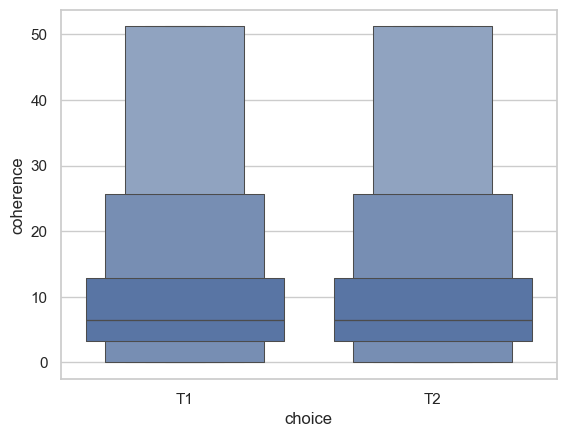

In [17]:
import seaborn as sns
sns.set_theme(style="whitegrid")

nuqta = sns.load_dataset("dots")
# clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot( x="choice", y="coherence",
              color="b", width_method="linear", data=nuqta
)